In [1]:
import importlib
import interpolate_lagrange
importlib.reload(interpolate_lagrange)

<module 'interpolate_lagrange' from '/home/florian/dev/github.com/thecodinglab/hm-scripts/sympy/interpolate_lagrange.py'>

In [2]:
import sympy as sp
from interpolate_lagrange import lagrange

data = sp.Matrix([
    [8., 11.2],
    [10., 13.4],
    [12., 15.3],
    [14., 19.5],
])

t = sp.Symbol('t')

p = lagrange(data, t, precision=4)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

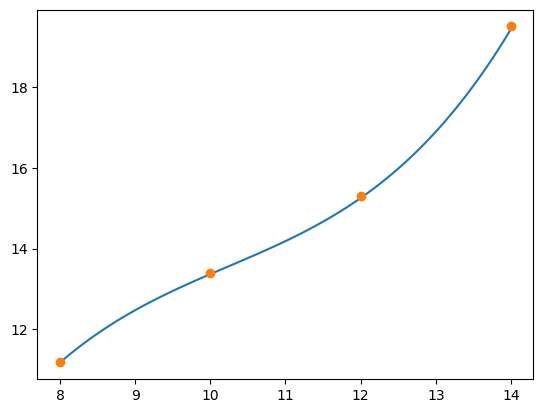

In [3]:
import numpy as np
import matplotlib.pyplot as plt

data_x = data[:, 0]
data_y = data[:, 1]

a = float(data_x[0])
b = float(data_x[-1])

x = np.linspace(a, b, 100)
f = sp.lambdify(t, p, 'numpy')

plt.plot(x, f(x))
plt.plot(data_x, data_y, 'o')
plt.show()

In [4]:
# Fehlerabschätzung

x = sp.Symbol('x')

f = 1  # Originale Funktion
n = data.shape[0]

df = sp.diff(f, x, n)
df_max = np.max([np.abs(df.subs(x, x_i)) for x_i in data_x])

x = 9

num = np.abs(np.prod([x - x_i for x_i in data_x]))
den = np.math.factorial(n)

err = df_max * num / den
print(err)

0
